In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
data = pd.read_csv("USArrests.csv")

In [5]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
dataTrim = data.loc[:, ['Murder', 'Assault', 'Rape']]
dataTrim.head()

,Murder,Assault,Rape
0,13.2,236,21.2
1,10.0,263,44.5
2,8.1,294,31.0
3,8.8,190,19.5
4,9.0,276,40.6


In [25]:
data_min = dataTrim['Murder'].min()
data_max = dataTrim['Murder'].max()

res_25 = data_min+(data_max-data_min)*(1/4)
res_50 = data_min+(data_max-data_min)*(2/4)
res_75 = data_min+(data_max-data_min)*(3/4)
print(res_25, res_50, res_75)

4.949999999999999 9.1 13.25


In [49]:
dataTrim.describe()['Murder']['50%']
#print(a)
#type(a)
##
#per_25 = a['Murder']['25%']
#per_50 = a['Murder']['50%']
#per_75 = a['Murder']['75%']

#print(per_25, per_50, per_75)


7.25

In [51]:
def funcRisk(fila):
    if(fila.Murder < per_50):
        fila['Risk'] = 'Poco'
    else:
        fila['Risk'] = 'Mucho'
        
    return fila
        
        
data.apply(funcRisk, axis = 'columns')



,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Risk
0,Alabama,13.2,236,58,21.2,Mucho
1,Alaska,10.0,263,48,44.5,Mucho
2,Arizona,8.1,294,80,31.0,Mucho
3,Arkansas,8.8,190,50,19.5,Mucho
4,California,9.0,276,91,40.6,Mucho
5,Colorado,7.9,204,78,38.7,Mucho
6,Connecticut,3.3,110,77,11.1,Poco
7,Delaware,5.9,238,72,15.8,Poco
8,Florida,15.4,335,80,31.9,Mucho
9,Georgia,17.4,211,60,25.8,Mucho


In [8]:
from sklearn.decomposition import PCA 
  
pca = PCA(3) 
pca.fit(dataTrim) 
  
pca_data = pd.DataFrame(pca.transform(dataTrim)) 
  
print(pca_data.head())

            0          1         2
0   65.222803  -4.860309  2.812779
1   93.737279  16.227166 -2.124128
2  123.530499   0.362189 -4.867595
3   19.081280  -3.165284  0.295500
4  106.354850  11.324520 -3.528043


In [9]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [10]:
clusters = 2

km = KMeans(init='random', n_clusters=clusters, random_state=333)
km.fit(dataTrim)

labels = km.labels_
centers = km.cluster_centers_

print(labels, centers)

km.inertia_

#plot_clusters(dataTrim, labels, centers)

[1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0] [[  4.84137931 109.75862069  16.24827586]
 [ 11.85714286 255.          28.11428571]]


86289.11024630541

In [11]:
https://www.geeksforgeeks.org/multidimensional-data-analysis-in-python/

SyntaxError: invalid syntax (<ipython-input-11-2d2c8b05bd60>, line 1)

In [12]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

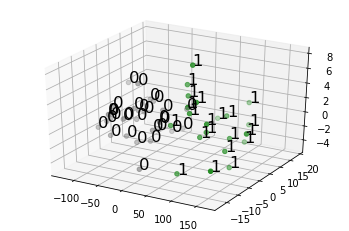

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            km.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, km.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

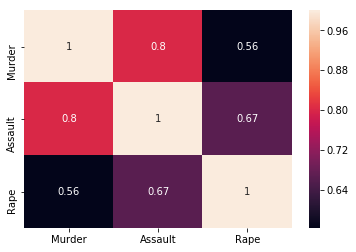

In [14]:
import seaborn as sns 
  
# generating correlation heatmap 
sns.heatmap(dataTrim.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 